In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split

from utils import evaluate_scores

# Data Load

In [2]:
df = pd.read_parquet("../data/cleaned/insomnia_healthy_patients.parquet")

df.head()

,PATIENT ID,DATE MONTH,DATE DAY,DATE WEEK DAY,SLEEP START,SLEEP START LAST DAY 1,SLEEP START LAST DAY 2,SLEEP START LAST DAY 3,SLEEP START LAST DAY 4,SLEEP START LAST DAY 5,...,BAD NIGHT,BAD NIGHT LAST DAY 1,BAD NIGHT LAST DAY 2,BAD NIGHT LAST DAY 3,BAD NIGHT LAST DAY 4,BAD NIGHT LAST DAY 5,BAD NIGHT LAST DAY 6,FREQUENCY OF BAD NIGHTS,FREQUENCY OF GOOD NIGHTS,INSOMNIA
70,b5581b1a132020fd07f64854c8fbe3df,1,7,4,22.166667,23.983333,22.700000,22.866667,23.450000,2.850000,...,0,1.0,0.0,0.0,1.0,0.0,1.0,3.0,4.0,1
71,1989843011c12217ba5ef04914877212,1,8,5,23.066667,22.166667,23.983333,22.700000,22.866667,23.450000,...,0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,5.0,1
72,83b7e7305157d7b4a3be1885d0f8bdb3,1,9,6,23.216667,23.066667,22.166667,23.983333,22.700000,22.866667,...,0,0.0,0.0,1.0,0.0,0.0,1.0,2.0,5.0,1
73,1ae209b6f15b012c97fbb6e4af42d4e2,1,10,0,22.616667,23.216667,23.066667,22.166667,23.983333,22.700000,...,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6.0,0
74,ea2ab5f4a4e6873b4227a2ca3f942b25,1,11,1,23.483333,22.616667,23.216667,23.066667,22.166667,23.983333,...,0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,6.0,0


# Simple Feature Selection

In [3]:
target_col = 'BAD NIGHT'

feature_cols = [
    "SLEEP START",
    "SLEEP END",
    "HOURS OF SLEEP",
    "REM SLEEP",
    "DEEP SLEEP",
    "HEART RATE BELOW RESTING",
]

df = df[feature_cols + [target_col]] 

df.head()

,SLEEP START,SLEEP END,HOURS OF SLEEP,REM SLEEP,DEEP SLEEP,HEART RATE BELOW RESTING,BAD NIGHT
70,22.166667,5.966667,6.800000,0.19,0.21,0.96,0
71,23.066667,8.083333,7.616667,0.12,0.17,0.98,0
72,23.216667,8.100000,7.783333,0.20,0.12,0.98,0
73,22.616667,7.150000,7.433333,0.23,0.18,0.96,0
74,23.483333,7.216667,6.983333,0.31,0.24,0.71,0


# Train and Test Split

In [4]:
X = df[feature_cols]
y = df[target_col].astype(bool)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train and Test Classification Models

In [5]:
method_names = []
method_accuracy_scores = []
method_sensitivity_scores = []
method_specificity_scores = []

In [6]:
from catboost import CatBoostClassifier

model = CatBoostClassifier()

model.fit(
    X_train,
    y_train,
    eval_set=(X_test, y_test),
    verbose=False,
)

y_hat = model.predict(X_test)
accuracy_result, sensitivity_result, specificity_result = evaluate_scores(y_test, y_hat)

method_names.append("Catboost")
method_accuracy_scores.append(accuracy_result)
method_sensitivity_scores.append(sensitivity_result)
method_specificity_scores.append(specificity_result)

Classification Scores: accuracy=0.9423076923076923 sensitivity=0.6666666666666666 specificity=1.0


In [7]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_test, y_test)
y_hat = model.predict(X_test)
accuracy_result, sensitivity_result, specificity_result = evaluate_scores(y_test, y_hat)

method_names.append("Naive Bayes")
method_accuracy_scores.append(accuracy_result)
method_sensitivity_scores.append(sensitivity_result)
method_specificity_scores.append(specificity_result)

Classification Scores: accuracy=0.9423076923076923 sensitivity=0.6666666666666666 specificity=1.0


In [8]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

y_hat = model.predict(X_test)
accuracy_result, sensitivity_result, specificity_result = evaluate_scores(y_test, y_hat)

method_names.append("Logistic Regression")
method_accuracy_scores.append(accuracy_result)
method_sensitivity_scores.append(sensitivity_result)
method_specificity_scores.append(specificity_result)

Classification Scores: accuracy=0.9423076923076923 sensitivity=0.6666666666666666 specificity=1.0


In [9]:
from sklearn.ensemble import RandomForestClassifier

rand_forest = RandomForestClassifier(n_estimators=100, random_state=42)
rand_forest.fit(X_train, y_train)

y_hat = model.predict(X_test)
accuracy_result, sensitivity_result, specificity_result = evaluate_scores(y_test, y_hat)

method_names.append("Random Forest")
method_accuracy_scores.append(accuracy_result)
method_sensitivity_scores.append(sensitivity_result)
method_specificity_scores.append(specificity_result)

Classification Scores: accuracy=0.9423076923076923 sensitivity=0.6666666666666666 specificity=1.0


In [10]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

y_hat = model.predict(X_test)
accuracy_result, sensitivity_result, specificity_result = evaluate_scores(y_test, y_hat)

method_names.append("SVM")
method_accuracy_scores.append(accuracy_result)
method_sensitivity_scores.append(sensitivity_result)
method_specificity_scores.append(specificity_result)

Classification Scores: accuracy=0.9423076923076923 sensitivity=0.6666666666666666 specificity=1.0


# Compare model results

All the models have the same result because we are using a syntetic database xD

Text(0, 0.5, 'Method Score')

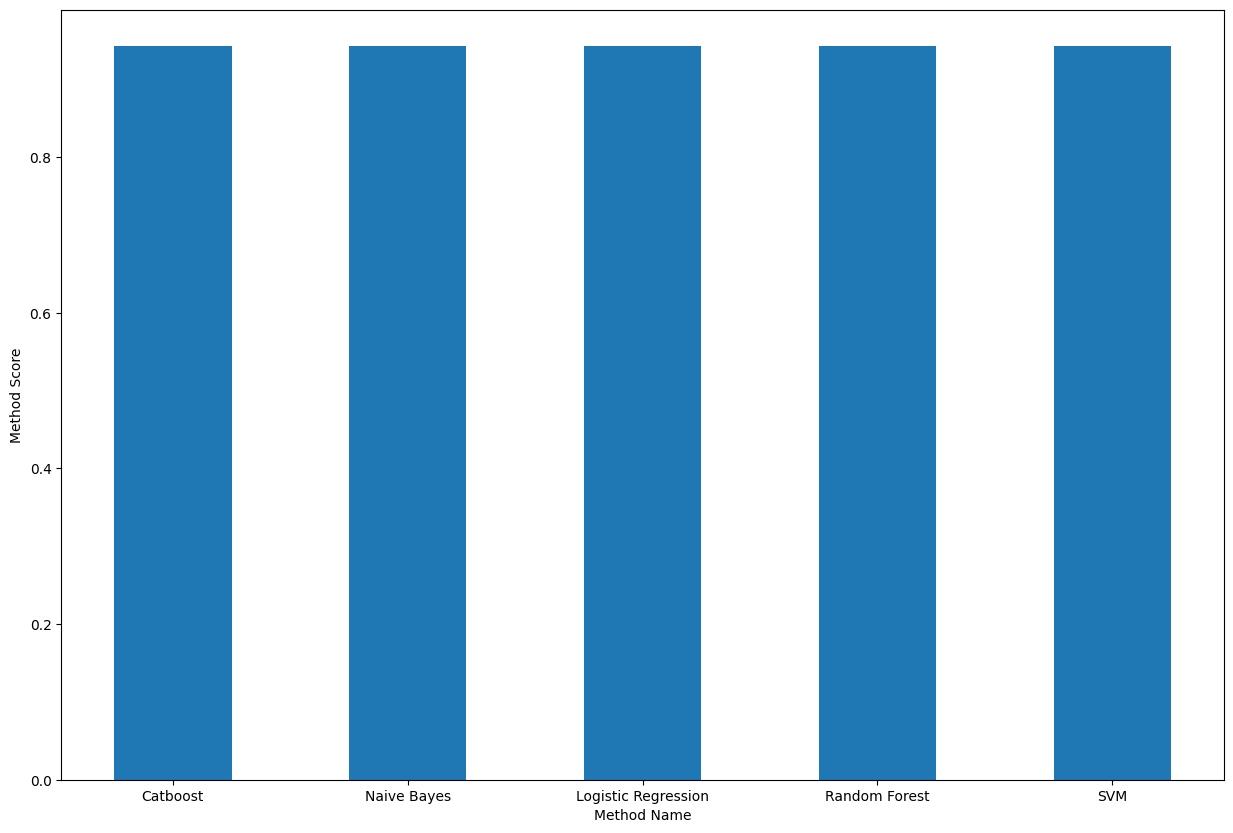

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.bar(method_names, method_accuracy_scores,width=0.5)
plt.xlabel('Method Name')
plt.ylabel('Method Score')

Text(0, 0.5, 'Method Score')

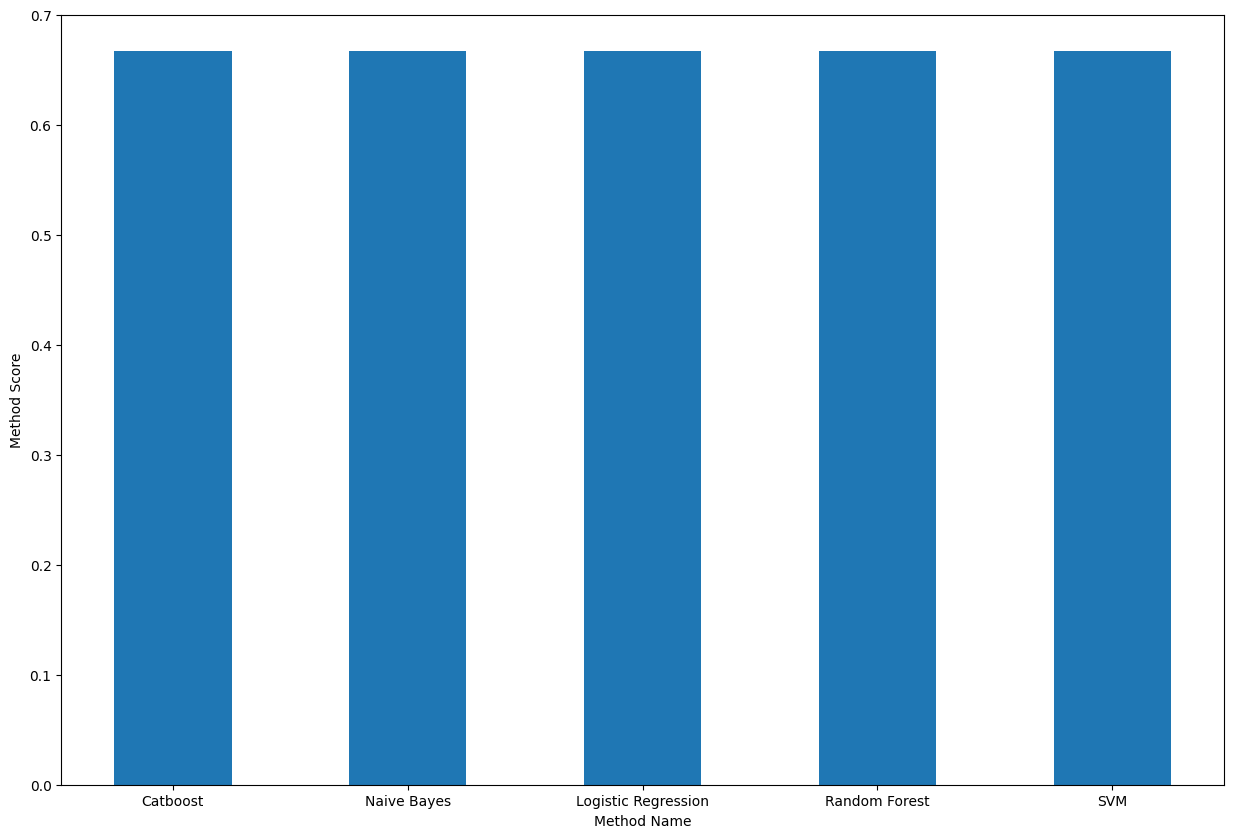

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.bar(method_names, method_sensitivity_scores, width=0.5)
plt.xlabel('Method Name')
plt.ylabel('Method Score')

Text(0, 0.5, 'Method Score')

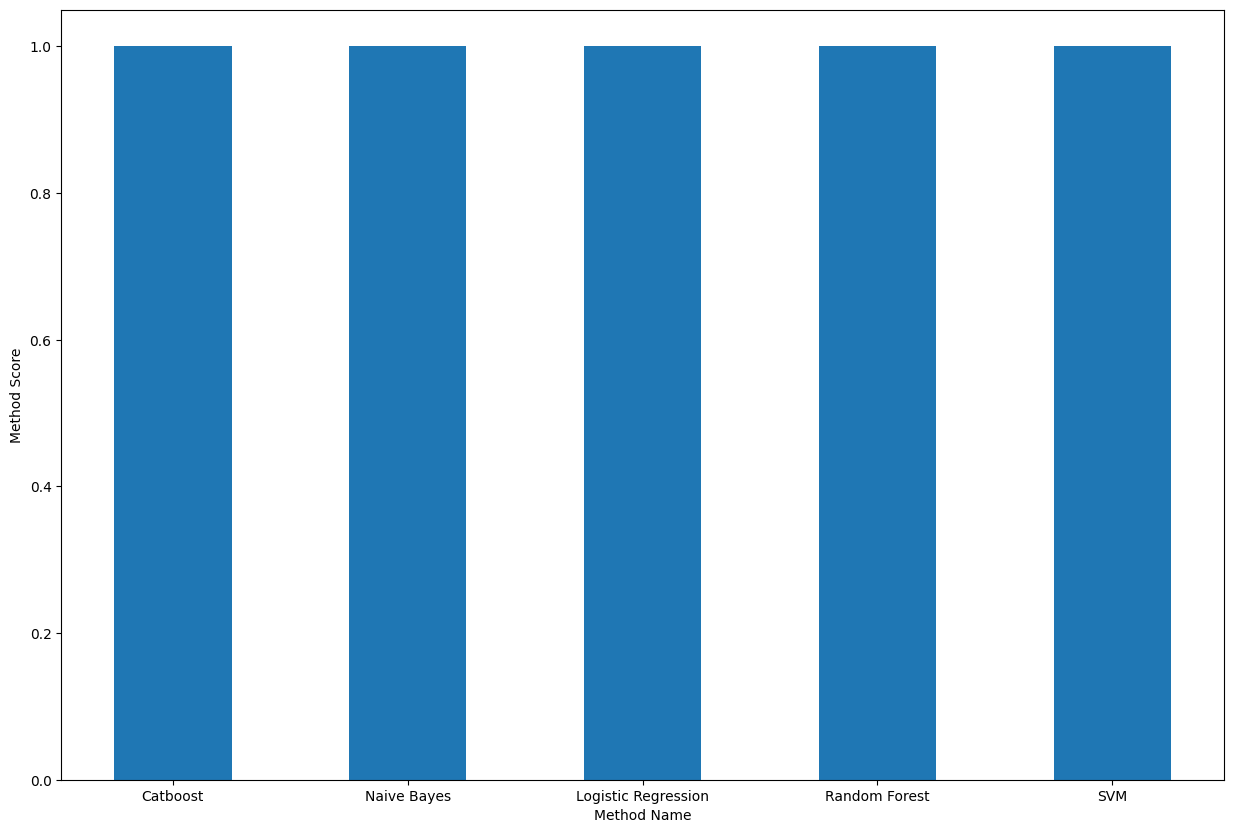

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
plt.bar(method_names, method_specificity_scores, width=0.5)
plt.xlabel('Method Name')
plt.ylabel('Method Score')